<a href="https://colab.research.google.com/github/mangare91/Variant-Gene-Drug-Disease-Relation/blob/master/GCN_on_Tox21_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Graph Convolutional Network on Tox21 

**Setting Up the Environment**

In [1]:
%%capture
%tensorflow_version 1.x
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [4]:
!wget -c https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
!chmod +x Anaconda3-2019.10-Linux-x86_64.sh
!bash ./Anaconda3-2019.10-Linux-x86_64.sh -b -f -p /usr/local
!conda install -y -c deepchem -c rdkit -c conda-forge -c omnia deepchem-gpu=2.3.0
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')


--2020-10-20 16:22:11--  https://repo.anaconda.com/archive/Anaconda3-2019.10-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _ipyw_jlab_nb_ext_conf==0.1.0=py37_0
    - _libgcc_mutex==0.1=main
    - alabaster==0.7.12=py37_0
    - anaconda-client==1.7.2=py37_0
    - anaconda-navigator==1.9.7=py37_0
    - anaconda-project==0.8.3=py_0
    - anaconda==2019.10=py37_0
    - asn1crypto==1.0.1=py37_0
    - astroid==2.3.1=py37_0


In [10]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py

!/root/miniconda/bin/conda info -e

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3490  100  3490    0     0  17989      0 --:--:-- --:--:-- --:--:-- 17989
# conda environments:
#
base                  *  /root/miniconda
                         /usr/local



In [11]:
!wget -c https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
# update 1
!conda install -q -y --prefix /usr/local python=3.6 ujson
# update 2
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages')
# test it
import ujson
print(ujson.dumps({1:2}))

--2020-10-20 16:31:53--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   233MB/s    in 0.2s    

2020-10-20 16:31:53 (233 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_64.sh’ saved [58468498/58468498]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6

In [14]:
%%bash
PYV=`python -c "import sys;t='{v[0]}.{v[1]}'.format(v=list(sys.version_info[:2]));sys.stdout.write(t)";`
echo "Python version $PYV detected"
if [ $PYV == "2.7" ]
then
  # Installing DeepChem for Python 2.7.
  apt-get install -y libxrender-dev
  apt-get install python-rdkit librdkit1 rdkit-data       # Install RDkit

  pip install joblib simdna

  git clone https://github.com/deepchem/deepchem.git      # Clone deepchem source code from GitHub
  cd deepchem && python setup.py install  

  ls -la /usr/local/lib/python2.7/dist-packages/deepchem/
else
  # Installing DeepChem for Python 3.6 using MiniConda.
  wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh -O anaconda.sh;
  chmod +x anaconda.sh
  bash ./anaconda.sh -b -f -p /usr/local
  conda install -y --prefix /usr/local -c conda-forge rdkit joblib simdna

  git clone https://github.com/deepchem/deepchem.git      # Clone deepchem source code from GitHub
  cd deepchem && python setup.py install
  ls -la /usr/local/lib/python3.6/site-packages/deepchem
fi%%bash
PYV=`python -c "import sys;t='{v[0]}.{v[1]}'.format(v=list(sys.version_info[:2]));sys.stdout.write(t)";`
echo "Python version $PYV detected"
if [ $PYV == "2.7" ]
then
  # Installing DeepChem for Python 2.7.
  apt-get install -y libxrender-dev
  apt-get install python-rdkit librdkit1 rdkit-data       # Install RDkit

  pip install joblib simdna

  git clone https://github.com/deepchem/deepchem.git      # Clone deepchem source code from GitHub
  cd deepchem && python setup.py install  

  ls -la /usr/local/lib/python2.7/dist-packages/deepchem/
else
  # Installing DeepChem for Python 3.6 using MiniConda.
  wget https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh -O anaconda.sh;
  chmod +x anaconda.sh
  bash ./anaconda.sh -b -f -p /usr/local
  conda install -y --prefix /usr/local -c conda-forge rdkit joblib simdna

  git clone https://github.com/deepchem/deepchem.git      # Clone deepchem source code from GitHub
  cd deepchem && python setup.py install
  ls -la /usr/local/lib/python3.6/site-packages/deepchem
fi

Python version 3.6 detected


bash: line 51: syntax error: unexpected end of file


In [1]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e
!pip install --pre deepchem
import deepchem
deepchem.__version__

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3490  100  3490    0     0  14129      0 --:--:-- --:--:-- --:--:-- 14129


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit, openmm, pdbfixer
added omnia to channels
added conda-forge to channels
done
conda packages installation finished!


# conda environments:
#
base                  *  /root/miniconda

     |████████████████████████████████| 399kB 9.2MB/s 
  Created wheel for deepchem: filename=deepchem-2.4.0rc1.dev20201020170241-cp36-none-any.whl size=499898 sha256=681d6aaeafeae68201d442af36149e2508aa3f61572d8843d637bb750b689ef8
  Stored in directory: /root/.cache/pip/wheels/2a/c4/f2/79627411771b8deb99e1bc30936eb8b65e14b6cd55ec240a95
Successfully built deepchem


'2.4.0-rc1.dev'

In [18]:
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np 
import tensorflow as tf
import deepchem as dc
from deepchem.models.graph_models import GraphConvModel
from deepchem.models import *


%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt



**Loading the Tox21 Dataset**

In [4]:
tox21_tasks, tox21_datasets, transformers = dc.molnet.load_tox21(featurizer='GraphConv', reload=False)
train_dataset, valid_dataset, test_dataset = tox21_datasets

In [6]:
n_tasks = len(tox21_tasks)
model = GraphConvModel(n_tasks, batch_size=50, mode='classification')

num_epochs = 50
losses = []
for i in range(num_epochs):
 loss = model.fit(train_dataset, nb_epoch=1)
 print("Epoch %d loss: %f" % (i, loss))
 losses.append(loss)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 0 loss: 0.186957
Epoch 1 loss: 0.180892
Epoch 2 loss: 0.167672
Epoch 3 loss: 0.125870
Epoch 4 loss: 0.163588
Epoch 5 loss: 0.154077
Epoch 6 loss: 0.152828
Epoch 7 loss: 0.148574
Epoch 8 loss: 0.141668
Epoch 9 loss: 0.142327
Epoch 10 loss: 0.136250
Epoch 11 loss: 0.124639
Epoch 12 loss: 0.125669
Epoch 13 loss: 0.131145
Epoch 14 loss: 0.124684
Epoch 15 loss: 0.122747
Epoch 16 loss: 0.125840
Epoch 17 loss: 0.122548
Epoch 18 loss: 0.118233
Epoch 19 loss: 0.104942
Epoch 20 loss: 0.118335
Epoch 21 loss: 0.115490
Epoch 22 loss: 0.110779
Epoch 23 loss: 0.102153
Epoch 24 loss: 0.110988
Epoch 25 loss: 0.105764
Epoch 26 loss: 0.071914
Epoch 27 loss: 0.101152
Epoch 28 loss: 0.106695
Epoch 29 loss: 0.099993
Epoch 30 loss: 0.095514
Epoch 31 loss: 0.097233
Epoch 32 loss: 0.096226
Epoch 33 loss: 0.093293
Epoch 34 loss: 0.080214
Epoch 35 loss: 0.090321
Epoch 36 loss: 0.093100
Epoch 37 loss: 0.090447
Epoch 38 loss: 0.082843
Epoch 39 loss: 0.086434
Epoch 40 loss: 0.086073
Epoch 41 loss: 0.083949
Ep

**Training the model**

In [7]:
model = GraphConvModel(
    len(tox21_tasks), batch_size=50, mode='classification')
epochs = 20
losses=[]
val_losses = []
for i in range(epochs): 
  loss = model.fit(train_dataset, nb_epoch=3)
  print("Epoch %d loss: %f" % (i, loss))
  val_loss = model.fit(valid_dataset,checkpoint_interval=0)
  losses.append(loss)
  val_losses.append(val_loss)
  model.restore()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:432: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 0 loss: 0.164592
Epoch 1 loss: 0.148702
Epoch 2 loss: 0.144675
Epoch 3 loss: 0.133763
Epoch 4 loss: 0.137715
Epoch 5 loss: 0.119518
Epoch 6 loss: 0.101045
Epoch 7 loss: 0.101697
Epoch 8 loss: 0.104170
Epoch 9 loss: 0.098587
Epoch 10 loss: 0.095123
Epoch 11 loss: 0.087866
Epoch 12 loss: 0.087240
Epoch 13 loss: 0.081999
Epoch 14 loss: 0.076714
Epoch 15 loss: 0.070662
Epoch 16 loss: 0.071357
Epoch 17 loss: 0.070736
Epoch 18 loss: 0.066747
Epoch 19 loss: 0.062247


**Evaluating the model**

In [8]:
metric = dc.metrics.Metric(
    dc.metrics.roc_auc_score, np.mean, mode="classification")

print("Evaluating model")
train_scores = model.evaluate(train_dataset, [metric], transformers)
print("Training ROC-AUC Score: %5.2f" % train_scores["mean-roc_auc_score"])
valid_scores = model.evaluate(valid_dataset, [metric], transformers)
print("Validation ROC-AUC Score: %5.2f" % valid_scores["mean-roc_auc_score"])
test_scores = model.evaluate(test_dataset, [metric], transformers)
print("Testing ROC-AUC Score: %5.2f" % test_scores["mean-roc_auc_score"])

Evaluating model
Training ROC-AUC Score:  0.98
Validation ROC-AUC Score:  0.78
Testing ROC-AUC Score:  0.80


**Visualizing Training and Validation losses against each Epoch**

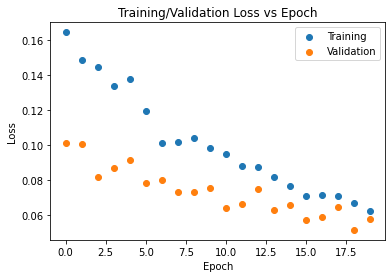

In [9]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training/Validation Loss vs Epoch")
plt.scatter(range(epochs),losses)
plt.scatter(range(epochs),val_losses)
plt.legend(['Training', 'Validation'])
plt.show()


### Implementing Graph Convolutional network on Tox21 from scratch

In [16]:
pip install tensorgraph

     |████████████████████████████████| 61kB 4.6MB/s 
  Created wheel for tensorgraph: filename=tensorgraph-5.0.1-cp36-none-any.whl size=73650 sha256=907161ba68f73930f2c43d47e86c4abb891dd3815fc38e3dc6f07b8658175041
  Stored in directory: /root/.cache/pip/wheels/c2/a2/17/463c0bfb5126c0f78a37169d515920ed6fb640f6421a47be08
Successfully built tensorgraph


**Creating a TensorGraph that holds the computation graph that defines the computation that a Graph convolutional network perform**

In [22]:
# Creating a TensorGraph that holds the computation graph that defines the 
# computation that a Graph convolutional network perform
from deepchem.models import *
#tg = TensorGraph(use_queue=False)

**Defining the inputs to the model**

In [23]:
#Feature layer defines the input to the TensorGraph model
from deepchem.models.tensorgraph.layers import Feature  

#each atom is a vector of length 75
atom_features = Feature(shape=(None, 75))
#indexing convenience that makes it easy to locate atoms from all molecules with a given degree       
degree_slice = Feature(shape=(None, 2), dtype=tf.int32)
#membership of an atom to a molecule     
membership = Feature(shape=(None,), dtype=tf.int32)     

#degree adjacency list: list that contains adjacency lists grouped by atom degree
deg_adjs = []       
for i in range(0, 10 + 1):
    deg_adj = Feature(shape=(None, i + 1), dtype=tf.int32)
    deg_adjs.append(deg_adj)

ModuleNotFoundError: ignored

**Implementing the body of the Graph Convolutional Network**

In [ ]:
from deepchem.models.tensorgraph.layers import Dense, GraphConv, BatchNorm
from deepchem.models.tensorgraph.layers import GraphPool, GraphGather

batch_size = 50

gc1 = GraphConv(64,activation_fn=tf.nn.relu,in_layers
                =[atom_features, degree_slice, membership] + deg_adjs)
batch_norm1 = BatchNorm(in_layers=[gc1])
gp1 = GraphPool(in_layers=[batch_norm1, degree_slice, membership] + deg_adjs)
gc2 = GraphConv(64,activation_fn=tf.nn.relu,in_layers
                =[gp1, degree_slice, membership] + deg_adjs)
batch_norm2 = BatchNorm(in_layers=[gc2])
gp2 = GraphPool(in_layers=[batch_norm2, degree_slice, membership] + deg_adjs)
dense = Dense(out_channels=128, activation_fn=tf.nn.relu, in_layers=[gp2])
batch_norm3 = BatchNorm(in_layers=[dense])
readout = GraphGather(batch_size=batch_size,activation_fn=tf.nn.tanh,in_layers
                      =[batch_norm3, degree_slice, membership] + deg_adjs)

**Predictions on TensorGraph model from Tox21 dataset**

In [ ]:
from deepchem.models.tensorgraph.layers import Dense, SoftMax,SoftMaxCrossEntropy, WeightedError, Stack
from deepchem.models.tensorgraph.layers import Label, Weights

costs = []
labels = []

for task in range(len(tox21_tasks)):
    classification = Dense(out_channels=2, activation_fn=None, in_layers=[readout])

    softmax = SoftMax(in_layers=[classification])
    tg.add_output(softmax)

    label = Label(shape=(None, 2))
    labels.append(label)
    cost = SoftMaxCrossEntropy(in_layers=[label, classification])
    costs.append(cost)

all_cost = Stack(in_layers=costs, axis=1)
weights = Weights(shape=(None, len(tox21_tasks)))



loss = WeightedError(in_layers=[all_cost, weights])
tg.set_loss(loss)

**Training the model**

In [ ]:
from deepchem.metrics import to_one_hot
from deepchem.feat.mol_graphs import ConvMol

def data_generator(dataset, epochs=1, predict=False, pad_batches=True):
  for epoch in range(epochs):
       
    for ind, (X_b, y_b, w_b, ids_b) in enumerate(
        dataset.iterbatches(
            batch_size, pad_batches=pad_batches, deterministic=True)):
      d = {}
      for index, label in enumerate(labels):
        d[label] = to_one_hot(y_b[:, index])
      d[weights] = w_b
      multiConvMol = ConvMol.agglomerate_mols(X_b)
      d[atom_features] = multiConvMol.get_atom_features()
      d[degree_slice] = multiConvMol.deg_slice
      d[membership] = multiConvMol.membership
      for i in range(1, len(multiConvMol.get_deg_adjacency_lists())):
        d[deg_adjs[i - 1]] = multiConvMol.get_deg_adjacency_lists()[i]
      yield d

In [24]:
losses = []
val_losses = []
num_epochs = 50
for i in range(num_epochs):
  loss = tg.fit_generator(data_generator(train_dataset, epochs=1))
  val_loss = tg.fit_generator(data_generator(valid_dataset))
  print("Epoch %d loss: %f" % (i, loss))
  losses.append(loss)
  val_losses.append(val_loss)

NameError: ignored

**Evaluating the model performance**

In [ ]:
metric = dc.metrics.Metric(dc.metrics.roc_auc_score, np.mean, mode="classification")

def reshape_y_pred(y_true, y_pred):
    """
    TensorGraph.Predict returns a list of arrays, one for each output
    We also have to remove the padding on the last batch
    Metrics taks results of shape (samples, n_task, prob_of_class)
    """
    n_samples = len(y_true)
    retval = np.stack(y_pred, axis=1)
    return retval[:n_samples]


print("Evaluating model")
train_predictions = tg.predict_on_generator(data_generator(train_dataset, predict=True))
train_predictions = reshape_y_pred(train_dataset.y, train_predictions)
train_scores = metric.compute_metric(train_dataset.y, train_predictions, train_dataset.w)
print("Training ROC-AUC Score: %f" % train_scores)

valid_predictions = tg.predict_on_generator(data_generator(valid_dataset, predict=True))
valid_predictions = reshape_y_pred(valid_dataset.y, valid_predictions)
valid_scores = metric.compute_metric(valid_dataset.y, valid_predictions, valid_dataset.w)
print("Valid ROC-AUC Score: %f" % valid_scores)

test_predictions = tg.predict_on_generator(data_generator(test_dataset, predict=True))
test_predictions = reshape_y_pred(test_dataset.y, test_predictions)
test_scores = metric.compute_metric(test_dataset.y, test_predictions, test_dataset.w)
print("Testing ROC-AUC Score: %f" % test_scores)

Evaluating model
computed_metrics: [0.9872912260500968, 0.994966783076429, 0.9831283944006732, 0.9774839319398445, 0.9569214956170972, 0.9816271524920226, 0.9919798926928285, 0.9742361477241345, 0.9891258012430142, 0.9806722412088198, 0.9821703293452149, 0.9831862169267775]
Training ROC-AUC Score: 0.981899
computed_metrics: [0.9986642259931726, 0.9977678571428572, 0.9973603968506803, 0.9970767666497204, 0.9916136363636363, 0.9955156950672646, 0.9993942540671512, 0.9920148429977218, 0.9970802919708028, 0.9882348975188782, 0.9979640230903735, 0.9978466838931956]
Valid ROC-AUC Score: 0.995878
computed_metrics: [0.7921047777162885, 0.8719018715225089, 0.8675551764580446, 0.7740867699392925, 0.6744536918015643, 0.7787454120787454, 0.8083622972525653, 0.7574885052289939, 0.7694110454452823, 0.7472087178642056, 0.9069099185234453, 0.8192558203991132]
Testing ROC-AUC Score: 0.797290


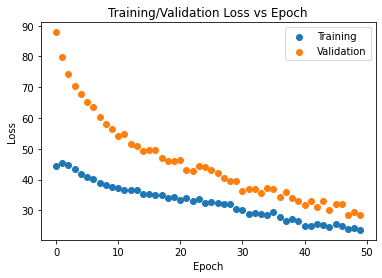

In [ ]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training/Validation Loss vs Epoch")
plt.scatter(range(num_epochs),losses)
plt.scatter(range(num_epochs),val_losses)
plt.legend(['Training', 'Validation'])
plt.show()